In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# Read data into a dataframe
df = pd.read_csv("insurance.csv")

# View a sample of the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
# Find data type in each column
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Convert categorical data into numeric

In [61]:
df = pd.get_dummies(data=df, columns=['smoker', 'sex', 'region'], drop_first=True)
df.head()

,age,bmi,children,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0


### Find correlation between data to identify which columns affect charges

In [62]:
corr_matrix = df.corr()
corr_matrix

,age,bmi,children,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.025019,-0.020856,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.003750,0.046371,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.007673,0.017163,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.787251,0.057292,-0.039905,0.073982,-0.043210
smoker_yes,-0.025019,0.003750,0.007673,0.787251,1.000000,0.076185,-0.036945,0.068498,-0.036945
sex_male,-0.020856,0.046371,0.017163,0.057292,0.076185,1.000000,-0.011156,0.017117,-0.004184
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.036945,-0.011156,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.068498,0.017117,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.036945,-0.004184,-0.320829,-0.346265,1.000000


In [63]:
# View correlation between charges and other columns
corr_matrix['charges']

age                 0.299008
bmi                 0.198341
children            0.067998
charges             1.000000
smoker_yes          0.787251
sex_male            0.057292
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64

### Data with correlation absolute values less than 0.1 can be considered insignificant and so they can be dropped

In [64]:
df.drop(['children', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1, inplace=True)
df.head()

,age,bmi,charges,smoker_yes
0,19,27.900,16884.92400,1
1,18,33.770,1725.55230,0
2,28,33.000,4449.46200,0
3,33,22.705,21984.47061,0
4,32,28.880,3866.85520,0


In [65]:
df.describe()

,age,bmi,charges,smoker_yes
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,0.204783
std,14.049960,6.098187,12110.011237,0.403694
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.296250,4740.287150,0.000000
50%,39.000000,30.400000,9382.033000,0.000000
75%,51.000000,34.693750,16639.912515,0.000000
max,64.000000,53.130000,63770.428010,1.000000


In [66]:
# Check for missing data
df.isnull().sum()

age           0
bmi           0
charges       0
smoker_yes    0
dtype: int64

No missing data

In [67]:
# Show how many unique values are in each column
df.nunique()

age             47
bmi            548
charges       1337
smoker_yes       2
dtype: int64

Note that the smoker_yes column has only two values (0,1) which means it has no outliers

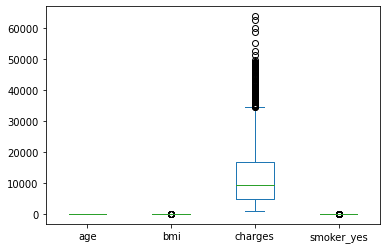

In [68]:
# Show outliers
df.plot.box()
plt.show()

## Detect outliers using Z-score

In [69]:
outliers=[]
def detect_outliers(data):
    
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [70]:
outlier_age = detect_outliers(df.age)

In [71]:
outlier_age

[]

In [72]:
outlier_bmi = detect_outliers(df.bmi)

In [73]:
outlier_bmi

[49.06, 50.38, 52.58, 53.13]

In [74]:
outliers=[]
outlier_charges = detect_outliers(df.charges)

In [75]:
outlier_charges

[51194.55914,
 63770.42801,
 58571.07448,
 55135.40209,
 52590.82939,
 60021.39897,
 62592.87309]

In [76]:
df.median()

age             39.000
bmi             30.400
charges       9382.033
smoker_yes       0.000
dtype: float64

### Replace all outliers with the median values

In [80]:
# bmi column
for i in outlier_bmi:
    df['bmi'] = df['bmi'].replace([i], df.bmi.median())
    
# charges column
for j in outlier_charges:
    df['charges'] = df['charges'].replace([j], df.charges.median())

In [81]:
df.describe()

,age,bmi,charges,smoker_yes
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.600953,13017.639724,0.204783
std,14.049960,5.991954,11671.678897,0.403694
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.296250,4740.287150,0.000000
50%,39.000000,30.400000,9377.936952,0.000000
75%,51.000000,34.580000,16209.325763,0.000000
max,64.000000,48.070000,49577.662400,1.000000


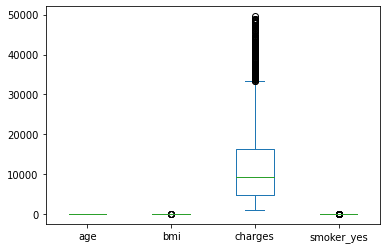

In [82]:
# Show outliers after applying z-score method
df.plot.box()
plt.show()

## Detect outliers further using IQR

In [83]:
def detect_limits(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    return lower_limit, upper_limit

In [84]:
limits_age = detect_limits(df.age)
limits_age

(-9.0, 87.0)

Note that the lower limit for the age is smaller than the minimum value in the age column, and the upper limit is larger than the maximum value which means that no data will be changed in this column.

In [85]:
limits_bmi = detect_limits(df.bmi)
limits_bmi

(13.870625000000004, 47.005624999999995)

Note that the lower limit for the bmi is smaller than the minimum value in the bmi column which means we will consider the upper limit.

In [86]:
limits_charges = detect_limits(df.charges)
limits_charges

(-12463.27076875, 33412.88368125)

Note that the lower limit for the charges is smaller than the minimum value in the charges column which means we will consider the upper limit.

In [87]:
detect_limits(df.smoker_yes)

(0.0, 0.0)

Note that the smoker_yes column showed both lower and upper limits as zero. Replacing values of one can't be applied in this case because it would corrupt the data.

### Replace all outliers with the median values

In [95]:
# bmi column --> upper limit only
upper_bmi = limits_bmi[1]
for value in df.bmi:
    if (value > upper_bmi):
        df['bmi'] = df['bmi'].replace([value], df.bmi.median())
        
# charges column --> upper limit only
upper_charges = limits_charges[1]
for value in df.charges:
    if (value > upper_charges):
        df['charges'] = df['charges'].replace([value], df.charges.median())

In [96]:
df.describe()

,age,bmi,charges,smoker_yes
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.536424,9668.307273,0.204783
std,14.049960,5.899998,6495.044806,0.403694
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.296250,4740.287150,0.000000
50%,39.000000,30.400000,9377.904700,0.000000
75%,51.000000,34.430000,12128.458712,0.000000
max,64.000000,46.750000,33307.550800,1.000000


### Normalize the data

In [97]:
df_normalized = (df - df.min()) / (df.max() - df.min())
df_normalized

,age,bmi,charges,smoker_yes
0,0.021739,0.387788,0.489754,1.0
1,0.000000,0.578435,0.018756,0.0
2,0.217391,0.553426,0.103387,0.0
3,0.326087,0.219065,0.648195,0.0
4,0.304348,0.419617,0.085286,0.0
...,...,...,...,...
1333,0.695652,0.487496,0.294500,0.0
1334,0.000000,0.518350,0.033683,0.0
1335,0.000000,0.678467,0.015782,0.0
1336,0.065217,0.319584,0.027530,0.0


In [98]:
df_standardized = (df - df.mean()) / df.std()
df_standardized

,age,bmi,charges,smoker_yes
0,-1.438227,-0.446852,1.111096,1.969850
1,-1.509401,0.548064,-1.222895,-0.507273
2,-0.797655,0.417555,-0.803512,-0.507273
3,-0.441782,-1.327360,1.896240,-0.507273
4,-0.512957,-0.280750,-0.893212,-0.507273
...,...,...,...,...
1333,0.768185,0.073488,0.143531,-0.507273
1334,-1.509401,0.234505,-1.148926,-0.507273
1335,-1.509401,1.070098,-1.237632,-0.507273
1336,-1.295877,-0.802784,-1.179416,-0.507273


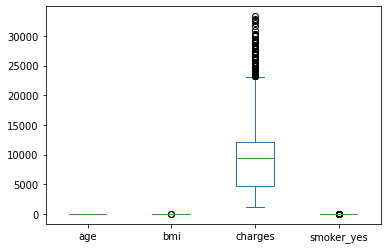

In [99]:
# Unprocessed data
df.plot.box() 
plt.show()

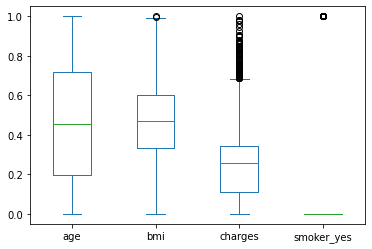

In [100]:
df_normalized.plot.box() 
plt.show()

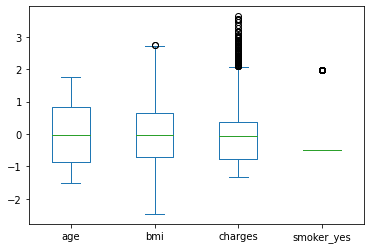

In [101]:
df_standardized.plot.box() 
plt.show()